# 代码仓库：https://github.com/syb-5213/Predict
### 选题：Hotel booking demand, 酒店预订需求

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [2]:
print("读取数据中...")
data = pd.read_csv('hotel_bookings.csv')
print("读取完毕。")

读取数据中...
读取完毕。


# 1.基本情况：城市酒店和假日酒店预订需求和入住率比较；

In [4]:
Resort_Hotel=data[data['hotel'].isin(["Resort Hotel"])]
City_Hotel=data[data['hotel'].isin(["City Hotel"])]
Resort_Hotel_cancel=len(Resort_Hotel[Resort_Hotel['is_canceled'].isin([1])])
City_Hotel_cancel=len(City_Hotel[City_Hotel['is_canceled'].isin([1])])
print("度假酒店预订订单数为"+str(len(Resort_Hotel))+"个,取消订单数为"+str(Resort_Hotel_cancel)+"个,最终预定单数为"+str(len(Resort_Hotel)-Resort_Hotel_cancel)+"个。")
print("城市酒店预订订单数为"+str(len(City_Hotel))+"个,取消订单数为"+str(City_Hotel_cancel)+"个,最终预定单数为"+str(len(City_Hotel)-City_Hotel_cancel)+"个。")
print("度假酒店的入住率为"+str(round((len(Resort_Hotel)-Resort_Hotel_cancel)/len(Resort_Hotel)*100,2))+"%.")
print("城市酒店的入住率为"+str(round((len(City_Hotel)-City_Hotel_cancel)/len(City_Hotel)*100,2))+"%.")

度假酒店预订订单数为40060个,取消订单数为11122个,最终预定单数为28938个。
城市酒店预订订单数为79330个,取消订单数为33102个,最终预定单数为46228个。
度假酒店的入住率为72.24%.
城市酒店的入住率为58.27%.


由预定酒店结果可以看出，城市酒店的预定需求明显高于度假酒店,而反观两种酒店的入住率，度假酒店明显优于城市酒店，说明了城市酒店虽然预定需求量大，但临时变动的情况较多，人们有更大的可能性变更计划，而选择度假的人们往往不会更改自己的计划。

# 2.用户行为：提前预订时间、入住时长、预订间隔、餐食预订情况；

## 2.1提前预订时间统计

### 2.1.1度假酒店

度假酒店订单提前预定时间的直方图以及盒图如下所示

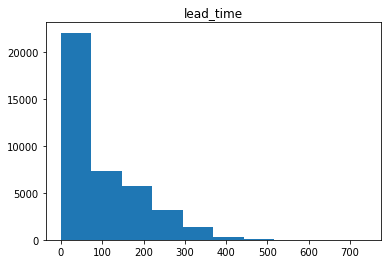

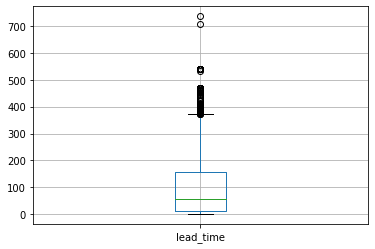

In [5]:
Resort_Hotel.hist("lead_time",grid=False)
plt.show()
boxplot=Resort_Hotel["lead_time"].to_frame().boxplot()
plt.show()

度假酒店提前预订时间的五数概括如下所示

In [7]:
t_data=Resort_Hotel["lead_time"]
print("Min:\t"+str(np.nanmin(t_data)))
print("Q1:\t"+str(np.nanpercentile(t_data,25)))
print("Median:\t"+str(np.nanmedian(t_data)))
print("Q3:\t"+str(np.nanpercentile(t_data,75)))
print("Max:\t"+str(np.nanmax(t_data)))

Min:	0
Q1:	10.0
Median:	57.0
Q3:	155.0
Max:	737


由直方图、盒图及五数概括结果可以看出度假酒店超过一半的订单都是预定60天内入住，时间最长的订单预定时间为737天。

### 2.1.2城市酒店

城市酒店订单提前预定时间的直方图以及盒图如下所示

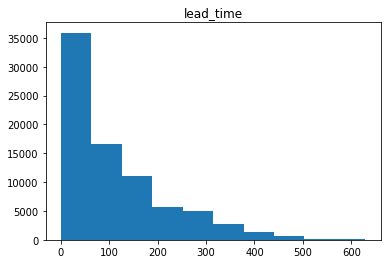

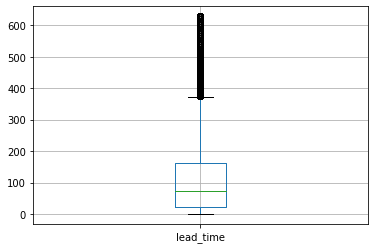

In [8]:
City_Hotel.hist("lead_time",grid=False)
plt.show()
boxplot=City_Hotel["lead_time"].to_frame().boxplot()
plt.show()

城市酒店提前预订时间的五数概括如下所示

In [9]:
t_data=City_Hotel["lead_time"]
print("Min:\t"+str(np.nanmin(t_data)))
print("Q1:\t"+str(np.nanpercentile(t_data,25)))
print("Median:\t"+str(np.nanmedian(t_data)))
print("Q3:\t"+str(np.nanpercentile(t_data,75)))
print("Max:\t"+str(np.nanmax(t_data)))

Min:	0
Q1:	23.0
Median:	74.0
Q3:	163.0
Max:	629


由直方图、盒图及五数概括结果可以看出城市酒店超过一半的订单都是预定80天内入住，时间最长的订单预定时间为629天。

### 2.1.3全部订单

总订单订单提前预定时间的直方图以及盒图如下所示

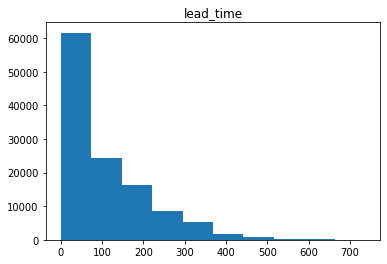

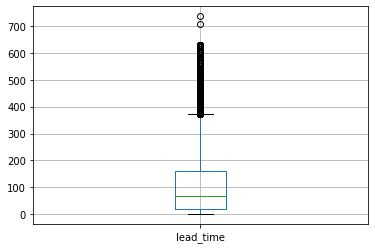

In [10]:
data.hist("lead_time",grid=False)
plt.show()
boxplot=data["lead_time"].to_frame().boxplot()
plt.show()

总订单提前预订时间的五数概括如下所示

In [12]:
t_data=data["lead_time"]
print("Min:\t"+str(np.nanmin(t_data)))
print("Q1:\t"+str(np.nanpercentile(t_data,25)))
print("Median:\t"+str(np.nanmedian(t_data)))
print("Q3:\t"+str(np.nanpercentile(t_data,75)))
print("Max:\t"+str(np.nanmax(t_data)))

Min:	0
Q1:	18.0
Median:	69.0
Q3:	160.0
Max:	737


由直方图、盒图及五数概括结果可以看出超过一半的订单都是预定百天内入住，另外有6345个订单是预定当天即入住，时间最长的订单预定时间为737天。

## 2.2入住时长统计

### 2.2.1度假酒店

度假酒店入住时长的直方图以及盒图如下所示

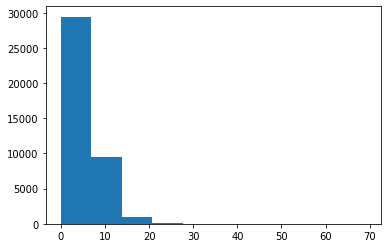

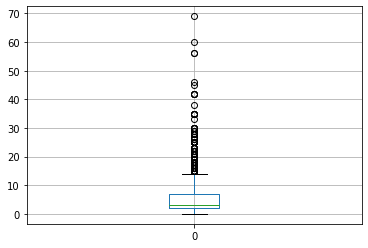

In [13]:
Resort_Hotel_stay=Resort_Hotel["stays_in_weekend_nights"]+Resort_Hotel["stays_in_week_nights"]
Resort_Hotel_stay.hist(grid=False)
plt.show()
boxplot=Resort_Hotel_stay.to_frame().boxplot()
plt.show()

度假酒店入住时长的五数概括如下所示

In [14]:
t_data=Resort_Hotel_stay
print("Min:\t"+str(np.nanmin(t_data)))
print("Q1:\t"+str(np.nanpercentile(t_data,25)))
print("Median:\t"+str(np.nanmedian(t_data)))
print("Q3:\t"+str(np.nanpercentile(t_data,75)))
print("Max:\t"+str(np.nanmax(t_data)))

Min:	0
Q1:	2.0
Median:	3.0
Q3:	7.0
Max:	69


由直方图、盒图及五数概括结果可以看出度假酒店超过一半的订单都是预定时长在3天内，入住时间最长的订单为69天。

### 2.2.2城市酒店

城市酒店入住时长的直方图以及盒图如下所示

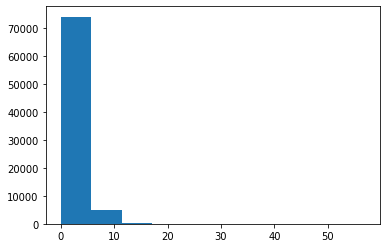

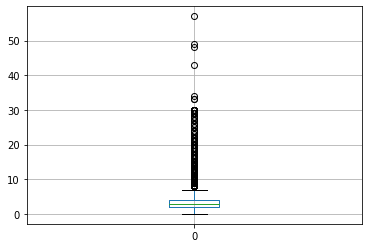

In [15]:
City_Hotel_stay=City_Hotel["stays_in_weekend_nights"]+City_Hotel["stays_in_week_nights"]
City_Hotel_stay.hist(grid=False)
plt.show()
boxplot=City_Hotel_stay.to_frame().boxplot()
plt.show()

城市酒店入住时长的五数概括如下所示

In [16]:
t_data=City_Hotel_stay
print("Min:\t"+str(np.nanmin(t_data)))
print("Q1:\t"+str(np.nanpercentile(t_data,25)))
print("Median:\t"+str(np.nanmedian(t_data)))
print("Q3:\t"+str(np.nanpercentile(t_data,75)))
print("Max:\t"+str(np.nanmax(t_data)))

Min:	0
Q1:	2.0
Median:	3.0
Q3:	4.0
Max:	57


由直方图、盒图及五数概括结果可以看出城市酒店超过一半的订单都是预定时长在3天内，入住时间最长的订单为57天。

### 2.2.3全部订单 

总订单入住时长的直方图以及盒图如下所示

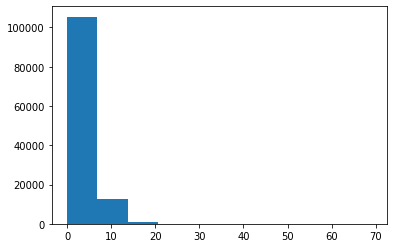

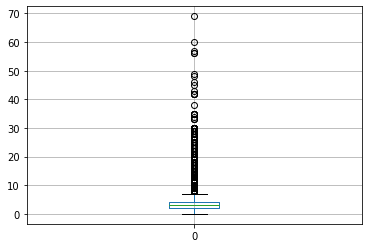

In [17]:
stay=data["stays_in_weekend_nights"]+data["stays_in_week_nights"]
stay.hist(grid=False)
plt.show()
boxplot=stay.to_frame().boxplot()
plt.show()

总订单入住时长的五数概括如下所示

In [18]:
t_data=stay
print("Min:\t"+str(np.nanmin(t_data)))
print("Q1:\t"+str(np.nanpercentile(t_data,25)))
print("Median:\t"+str(np.nanmedian(t_data)))
print("Q3:\t"+str(np.nanpercentile(t_data,75)))
print("Max:\t"+str(np.nanmax(t_data)))

Min:	0
Q1:	2.0
Median:	3.0
Q3:	4.0
Max:	69


由直方图、盒图及五数概括结果可以看出超过一半的订单都是预定时长在3天内，超过75%的订单预定时长在4天内，另外有21020个订单是预定入住时长为1晚上，入住时间最长的订单为69天。

## 2.3预定间隔统计

### 2.3.1度假酒店

度假酒店预定确认间隔的直方图以及盒图如下所示

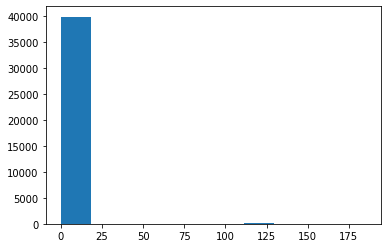

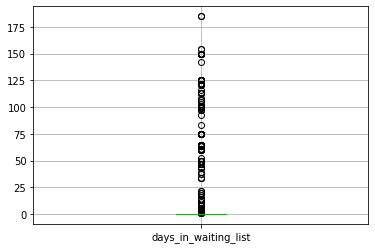

In [19]:
Resort_Hotel["days_in_waiting_list"].hist(grid=False)
plt.show()
boxplot=Resort_Hotel["days_in_waiting_list"].to_frame().boxplot()
plt.show()

度假酒店预定确认间隔的五数概括如下所示

In [20]:
t_data=Resort_Hotel["days_in_waiting_list"]
print("Min:\t"+str(np.nanmin(t_data)))
print("Q1:\t"+str(np.nanpercentile(t_data,25)))
print("Median:\t"+str(np.nanmedian(t_data)))
print("Q3:\t"+str(np.nanpercentile(t_data,75)))
print("Max:\t"+str(np.nanmax(t_data)))

Min:	0
Q1:	0.0
Median:	0.0
Q3:	0.0
Max:	185


由直方图、盒图及五数概括结果可以看出度假酒店超过75%的订单都是在预定当天进行确认的，最长预定确认间隔为185天。

### 2.3.2城市酒店

城市酒店预定确认间隔的直方图以及盒图如下所示

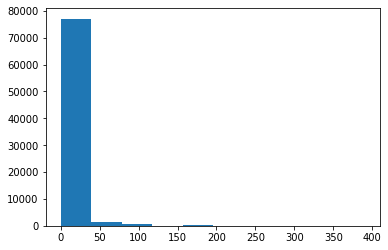

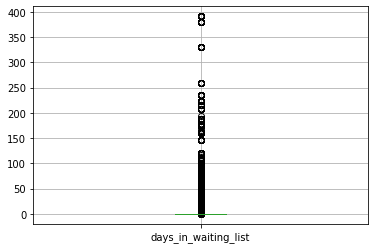

In [21]:
City_Hotel["days_in_waiting_list"].hist(grid=False)
plt.show()
boxplot=City_Hotel["days_in_waiting_list"].to_frame().boxplot()
plt.show()

城市酒店预定确认间隔的五数概括如下所示：

In [22]:
t_data=City_Hotel["days_in_waiting_list"]
print("Min:\t"+str(np.nanmin(t_data)))
print("Q1:\t"+str(np.nanpercentile(t_data,25)))
print("Median:\t"+str(np.nanmedian(t_data)))
print("Q3:\t"+str(np.nanpercentile(t_data,75)))
print("Max:\t"+str(np.nanmax(t_data)))

Min:	0
Q1:	0.0
Median:	0.0
Q3:	0.0
Max:	391


由直方图、盒图及五数概括结果可以看出城市酒店超过75%的订单都是在预定当天进行确认的，最长预定确认间隔为391天。

### 2.3.3全部订单

总订单预定确认间隔的直方图以及盒图如下所示：

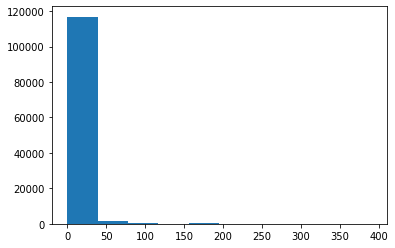

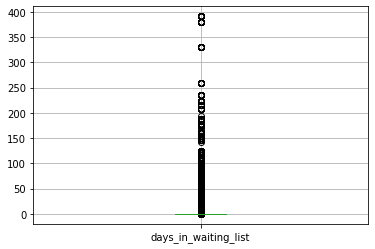

In [23]:
data["days_in_waiting_list"].hist(grid=False)
plt.show()
boxplot=data["days_in_waiting_list"].to_frame().boxplot()
plt.show()

总订单预定确认间隔的五数概括如下所示

In [24]:
t_data=data["days_in_waiting_list"]
print("Min:\t"+str(np.nanmin(t_data)))
print("Q1:\t"+str(np.nanpercentile(t_data,25)))
print("Median:\t"+str(np.nanmedian(t_data)))
print("Q3:\t"+str(np.nanpercentile(t_data,75)))
print("Max:\t"+str(np.nanmax(t_data)))

Min:	0
Q1:	0.0
Median:	0.0
Q3:	0.0
Max:	391


由直方图、盒图及五数概括结果可以看出超过75%的订单都是在预定当天进行确认的，最长预定确认间隔为391天。

## 2.4餐食预订情况统计 

总订单餐食预定情况如下所示：

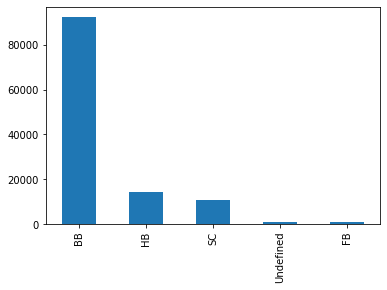

无餐食预定订单数量为11819个;
预定早餐订单为92310个;
预定早餐加午餐订单为14463个;
预定全餐食订单为798个。


In [25]:
data['meal'].value_counts().plot.bar()
plt.show()
print("无餐食预定订单数量为"+str(len(data[data['meal'].isin(["Undefined"])])+len(data[data['meal'].isin(["SC"])]))+"个;")
print("预定早餐订单为"+str(len(data[data['meal'].isin(["BB"])]))+"个;")
print("预定早餐加午餐订单为"+str(len(data[data['meal'].isin(["HB"])]))+"个;")
print("预定全餐食订单为"+str(len(data[data['meal'].isin(["FB"])]))+"个。")

由统计结果可以看出大部分订单都预定了早餐。

# 3.一年中最佳预订酒店时间；

## 3.1度假酒店

筛选出度假酒店每月订单数量如下所示：

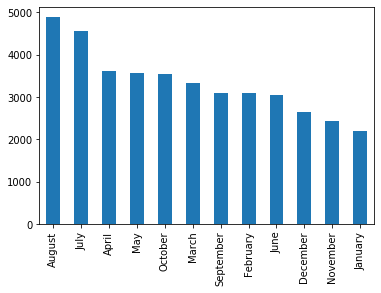

In [26]:
Resort_Hotel['arrival_date_month'].value_counts().plot.bar()
plt.show()

由柱状图可以看出度假酒店8月份的预订数量最多，筛选出8月份度假酒店每天的订单数量如下所示：

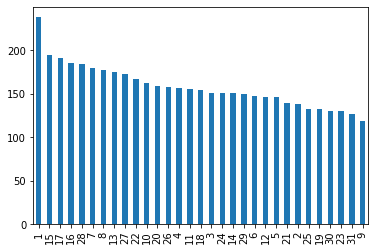

In [27]:
Resort_Hotel[Resort_Hotel['arrival_date_month'].isin(["August"])]['arrival_date_day_of_month'].value_counts().plot.bar()
plt.show()

由柱状图可以看出度假酒店每年8月1日的预订数量最多，即该天为度假酒店最佳入住时间。

筛选出8月1日入住度假酒店，并且预订确认间隔为当天且预订房型与实际房型一致的订单。

In [28]:
august=Resort_Hotel[Resort_Hotel['arrival_date_month'].isin(["August"])]
august_1st=august[august['arrival_date_day_of_month'].isin([1])]
august_1st_0=august_1st[august_1st['days_in_waiting_list'].isin([0])]
august_1st_0_same=august_1st_0[august_1st_0['reserved_room_type']==august_1st_0['assigned_room_type']]
print("提前"+str(august_1st_0_same['lead_time'].mode()[0])+"天预订。")

提前180天预订。


预订度假酒店的最佳方案为提前180天预订8月1日的酒店。

## 3.2城市酒店

筛选出城市酒店每月订单数量如下所示：

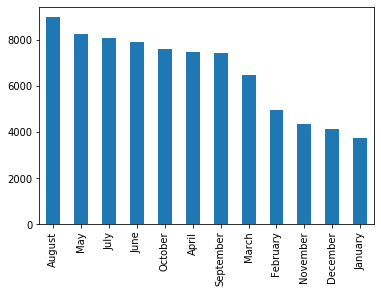

In [29]:
City_Hotel['arrival_date_month'].value_counts().plot.bar()
plt.show()

由柱状图可以看出城市酒店8月份的预订数量最多，筛选出8月份城市酒店每天的订单数量如下所示：

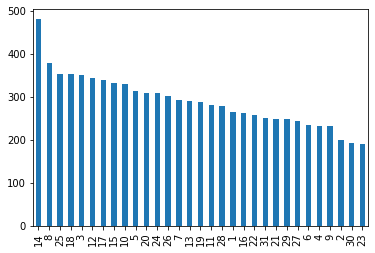

In [30]:
City_Hotel[City_Hotel['arrival_date_month'].isin(["August"])]['arrival_date_day_of_month'].value_counts().plot.bar()
plt.show()

由柱状图可以看出度城市店每年8月14日的预订数量最多，即该天为城市酒店最佳入住时间。

筛选出8月14日入住城市酒店，并且预订确认间隔为当天且预订房型与实际房型一致的订单。

In [31]:
august=City_Hotel[City_Hotel['arrival_date_month'].isin(["August"])]
august_14=august[august['arrival_date_day_of_month'].isin([1])]
august_14_0=august_14[august_14['days_in_waiting_list'].isin([0])]
august_14_0_same=august_14_0[august_14_0['reserved_room_type']==august_14_0['assigned_room_type']]
print("提前"+str(august_14_0_same['lead_time'].mode()[0])+"天预订。")

提前117天预订。


预订城市酒店的最佳方案为提前117天预订8月14日的酒店。

# 4.利用Logistic预测酒店预订。

筛选出部分特征作为模型数据，并分为数值特征和分类特征两类，如下所示。

In [32]:
num_features = ["lead_time","arrival_date_week_number","arrival_date_day_of_month",
                "stays_in_weekend_nights","stays_in_week_nights","adults",
                "babies","is_repeated_guest", "previous_cancellations",
                "previous_bookings_not_canceled",
                "required_car_parking_spaces", "total_of_special_requests", "adr"]

cat_features = ["hotel","arrival_date_month","meal","market_segment",
                "distribution_channel","reserved_room_type","deposit_type","customer_type"]

将分类特征值转为one-hot形式从而可以参与训练

In [33]:
ncat_features=[]
for i in cat_features:
    encoder = LabelEncoder()  
    temp = encoder.fit_transform(data[i].values)  
    temp = np.array([temp]).T
    enc = OneHotEncoder(categories='auto')
    temp=enc.fit_transform(temp)
    temp=temp.toarray()
    t=[]
    for j in range(len(temp[0])):
        ncat_features.append(i+str(j+1))
        t.append(i+str(j+1))
    temp=pd.DataFrame(temp,columns=t)
    data = pd.concat([data,pd.DataFrame(temp)],axis=1)
    data = data.drop(i,axis=1)

将数据集随机打乱并取前80%作为训练集，后20%作为测试集进行训练。

In [44]:
scale=0.8
data = data.reindex(np.random.permutation(data.index))
train_x=data.drop(["is_canceled"], axis=1)[num_features+ncat_features][:int(len(data)*scale)]
train_y=data["is_canceled"][:int(len(data)*scale)]
test_x=data.drop(["is_canceled"], axis=1)[num_features+ncat_features][int(len(data)*scale)+1:]
test_y=data["is_canceled"][int(len(data)*scale)+1:]
modelLR=LogisticRegression()
modelLR.fit(train_x,train_y)

D:\ana\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

在测试集上进行模型测试

In [45]:
modelLR.score(test_x,test_y)

0.8132512459689241

最终模型在测试集上准确率能够达到81.33%，也就是对于测试集中数据给定特征能够有八成几率预测出该订单是否会被取消。